# Ford GoBike System Data
## by Arushi Chawla

## Preliminary Wrangling

> Bay Wheels bikes and ebikes are now available on the Lyft app. We are using Bay Wheels's trip data that is available for public use and is provided according to the Bay Wheels License Agreement. The dataset provides each trip's anonymized data and includes the trip, location, and user details.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
from zipfile import ZipFile
from io import BytesIO

%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Gathering
> As part of data gathering process, we download the data from https://s3.amazonaws.com/fordgobike-data/index.html and store it on our local machine. As a next step, all the data is merged in one dataframe.

In [2]:
# Create directory to store all the downloaded data files
folder_name = 'bike_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [2]:
# Download and write 2017 file
file_url_2017 = 'https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv'
pd.read_csv(file_url_2017).to_csv(folder_name + '/2017-forgobike-tripdata.csv')
    
# Download, unzip, and write 2018 files
months_2018 = ['01','02','03','04','05','06','07','08','09','10','11','12']
for month in months_2018:
    file_url_2018 = 'https://s3.amazonaws.com/fordgobike-data/2018' + month + '-fordgobike-tripdata.csv.zip'
    response = requests.get(file_url_2018)
    # Unzip the zipped folder and use BytesIO to return readable and writeable contents
    unzipped_file_2018 = ZipFile(BytesIO(response.content))
    # Extracts all files into the defined folder path
    unzipped_file_2018.extractall(folder_name)
    unzipped_file_2018.close()

# Download, unzip, and write 2019 files
months_2019 = ['01','02','03','04']
for month in months_2019:
    file_url_2019 = 'https://s3.amazonaws.com/fordgobike-data/2019' + month + '-fordgobike-tripdata.csv.zip'
    response = requests.get(file_url_2019)
    # Unzip the zipped folder and use BytesIO to return readable and writeable contents
    unzipped_file_2019 = ZipFile(BytesIO(response.content))
    # Extracts all files into the defined folder path
    unzipped_file_2019.extractall(folder_name)
    unzipped_file_2019.close()

In [ ]:
# Delete '.ipynb_checkpoints' temporary files created by auto-saving of notebook
!rm -r folder_name/'.ipynb_checkpoints'

In [3]:
# Read all the data files in the downloaded folder and concatinate in one dataframe
df = pd.concat((pd.read_csv(folder_name + '/' + file, engine='python') for file in os.listdir(folder_name)))

In [12]:
# Adding null_counts=True since by default it wouldn't show that for large datasets
df.info(null_counts=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254325 entries, 0 to 183411
Data columns (total 17 columns):
Unnamed: 0                 519700 non-null float64
bike_id                    3254325 non-null int64
bike_share_for_all_trip    2734625 non-null object
duration_sec               3254325 non-null int64
end_station_id             3241824 non-null float64
end_station_latitude       3254325 non-null float64
end_station_longitude      3254325 non-null float64
end_station_name           3241824 non-null object
end_time                   3254325 non-null object
member_birth_year          3036159 non-null float64
member_gender              3036592 non-null object
start_station_id           3241824 non-null float64
start_station_latitude     3254325 non-null float64
start_station_longitude    3254325 non-null float64
start_station_name         3241824 non-null object
start_time                 3254325 non-null object
user_type                  3254325 non-null object
dtypes: float64(

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,NaN,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,NaN,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,NaN,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,NaN,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,NaN,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


### What is the structure of the dataset?

> The dataframe has trips data from 2017 to 05/2019. It has a total of 17 columns and 3254325 rows that provide details of the trips, and users. Each row in the data informs a trip identified by a unique bike_id.

### What is/are the main feature(s) of interest in the dataset?

> Below are some of the features of interest: <br>
- What time of the day/week/month are most trips taken?
- Who takes ride more often - female or male?
- What is the average age of riders?
- Which station is the rides most taken in?
- How long does the average trip take?
- Does the ride behavior depend on user being a subscriber or customer?

### What features in the dataset will help support our investigation into the feature(s) of interest?

> Features that would support our investigation are: <br>
- start_time and end_time
- member_gender
- member_birth_year
- start_station_name and end_station_name
- duration_sec
- user type

## Data Cleaning
> As part of data cleaning ptocess, we create a copy of our dataframe and change field's data type wherever required. We also added new fields/features to the dataframe.

In [4]:
df_clean = df.copy()

In [5]:
# Correct the data types
df_clean['end_station_id'] = df_clean['end_station_id'].astype('object')
df_clean['start_station_id'] = df_clean['start_station_id'].astype('object')
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('Int64')

df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

df_clean['user_type'] = df_clean['user_type'].astype('category', ordered = False, categories = ['Customer','Subscriber'])
df_clean['member_gender'] = df_clean['member_gender'].astype('category', ordered = False, categories = ['Male', 'Female', 'Other'])


In [6]:
# Add new features

# Calculate member age and convert it to int64
df_clean['member_age'] = (2019 - df_clean['member_birth_year']).astype('Int64')

# Create member age groups to be able to categorize age
df_clean['member_age_category'] = df_clean['member_age'].apply(lambda x: 'Below 20' if x<=20
                                                               else '20 - 40' if 20<x<=40
                                                               else '40 - 60' if 40<x<=60
                                                               else 'Greater than 60')

# Convert trip duration from sec to mins
df_clean['duration_min'] = df_clean['duration_sec']/60

# Extract start and end date
df_clean['start_date']=df_clean['start_time'].dt.date
df_clean['end_date']=df_clean['end_time'].dt.date

# Extract hour, month, date, and dayofweek from start time
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['start_dow']  = df_clean['start_time'].dt.dayofweek
df_clean['start_day'] = df_clean['start_time'].dt.day
df_clean['start_month'] = df_clean['start_time'].dt.month

In [7]:
# Drop unwanted columns
df_clean.drop(['Unnamed: 0', 'bike_share_for_all_trip', 'duration_sec', 'member_birth_year'], axis=1, inplace = True)

## Data Validation
> Check on the datatypes and columns after we have cleaned the data set and created new fields.

In [9]:
# Adding null_counts = True since by default it wouldn't show counts for large datasets
df_clean.info(null_counts=True)
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254325 entries, 0 to 183411
Data columns (total 22 columns):
bike_id                    3254325 non-null int64
end_station_id             3241824 non-null object
end_station_latitude       3254325 non-null float64
end_station_longitude      3254325 non-null float64
end_station_name           3241824 non-null object
end_time                   3254325 non-null datetime64[ns]
member_gender              3036592 non-null category
start_station_id           3241824 non-null object
start_station_latitude     3254325 non-null float64
start_station_longitude    3254325 non-null float64
start_station_name         3241824 non-null object
start_time                 3254325 non-null datetime64[ns]
user_type                  3254325 non-null category
member_age                 3036159 non-null Int64
member_age_category        3254325 non-null object
duration_min               3254325 non-null float64
start_date                 3254325 non-null objec

,bike_id,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_gender,start_station_id,start_station_latitude,start_station_longitude,...,user_type,member_age,member_age_category,duration_min,start_date,end_date,start_hour,start_dow,start_day,start_month
0,1035,114,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,Male,284,37.784872,-122.400876,...,Subscriber,31,20 - 40,9.966667,2018-02-28,2018-03-01,23,2,28,2
1,1673,324,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,Male,6,37.804770,-122.403234,...,Customer,32,20 - 40,15.716667,2018-02-28,2018-02-28,23,2,28,2
2,3498,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,Female,93,37.770407,-122.391198,...,Customer,33,20 - 40,309.783333,2018-02-28,2018-02-28,18,2,28,2
3,3129,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,Male,93,37.770407,-122.391198,...,Customer,38,20 - 40,309.300000,2018-02-28,2018-02-28,18,2,28,2
4,1839,297,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,Female,308,37.336802,-121.894090,...,Subscriber,43,40 - 60,14.750000,2018-02-28,2018-02-28,23,2,28,2


## Data Assessment
> Under the data assessment, we perform univariate, bivariate, and multivariate analyses on our data. Each section has combined exploratory and explanatory visualizations to support the analyses and communicate the story and insights.

## Univariate Exploration

> In this section, we investigate distributions of individual variables and highlight any unusual points or outliers.

#### Start_time of the trip

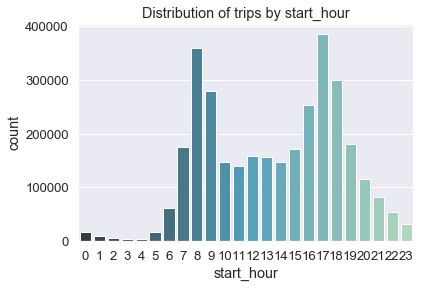

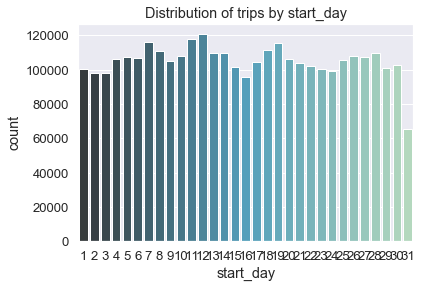

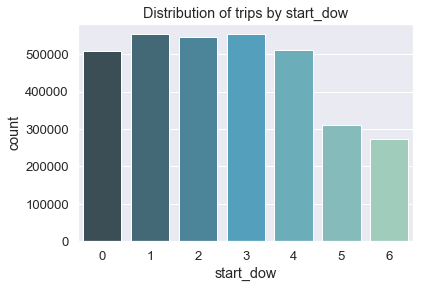

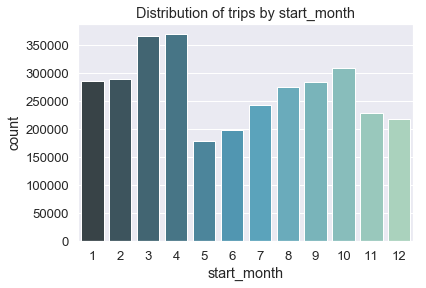

In [18]:
# Analyses on the number of trips by hour/day/dow/month
start_time_var = ['start_hour', 'start_day', 'start_dow', 'start_month']

for i in start_time_var:
    sb.countplot(df_clean[i], palette="GnBu_d");
    plt.title('Distribution of trips by '+ i)
    plt.show();

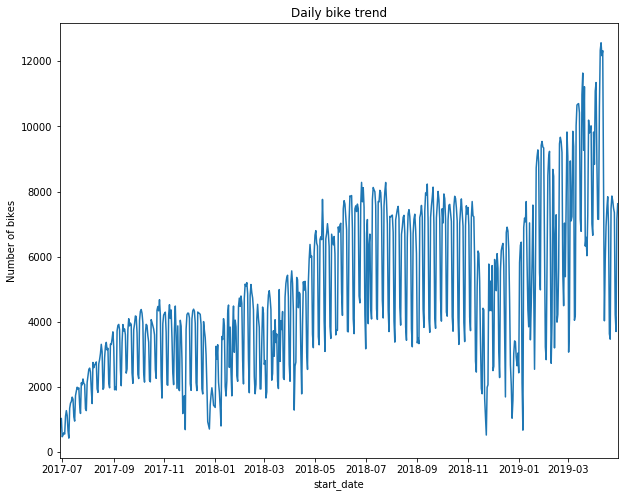

In [11]:
df_clean.groupby('start_date').agg({'bike_id':'count'}).plot(figsize=(10,8), legend=False);
plt.title('Daily bike trend');
plt.ylabel('Number of bikes');

#### Analyses on the start_time depicts that maximum rides are taken:
- Either taken in the mornings 8AM or evenings 5PM. This could very likely be because of people taking rides to work or school.
- From Mon-Fri (weekdays) and least rides being on saturdays and sundays which points us to believe the fact that people mostly ride these to works and schools. No other correlation was seen in the number of rides with the day of month otherwise.
- In the start of the year maximum being in March-April and least in May-June which could be because of the hot weather. The trend shows decline in the rides either in summer or winter season.
- The number of trips were either constant or slowly increasing uptil 11/2018 after which there is a sudden drop till 01/2019 followed by a peak for 2 months. The dip in 04/2019 could probably be explained by the lack of data in last month.

#### Gender of the member taking ride

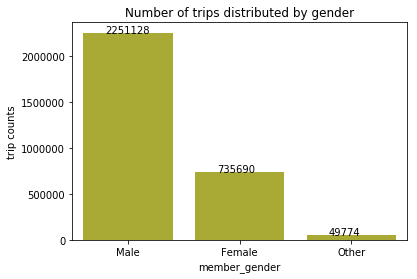

In [17]:
# Analyses on which gender takes more ride
base_color = sb.color_palette()[8];
ax = sb.countplot(df_clean['member_gender'], order=df_clean['member_gender'].value_counts().index, color=base_color);

for p, label in zip(ax.patches, df_clean['member_gender'].value_counts()):
    ax.annotate(label, (p.get_x()+0.20, p.get_height()));

plt.title('Number of trips distributed by gender');
plt.ylabel('trip counts');

Analyses on member gender depicts the number of trips taken by males are ~67% higher than females

#### Age of the member taking ride

In [14]:
# Analyses on the age distribution of riders
df_clean['member_age'].value_counts().head(10)

31    174820
32    148691
30    148213
29    141104
34    136066
28    134661
26    134034
33    132740
35    123118
27    120616
Name: member_age, dtype: int64

Analysing member age shows 25-35 is the age that has taken maximum rides. However, it is tricky to say anything else given the wide range of age which is why it is better to categorize age into different groups to analyze it further.

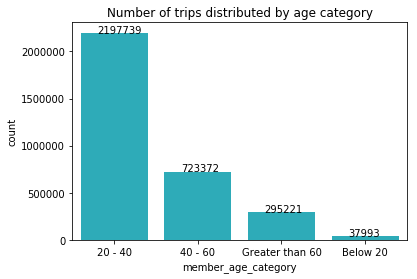

In [19]:
# Create age groups
base_color = sb.color_palette()[9];
ax = sb.countplot(df_clean['member_age_category'], order=df_clean['member_age_category'].value_counts().index, color=base_color);

for p, label in zip(ax.patches, df_clean['member_age_category'].value_counts()):
    ax.annotate(label, (p.get_x()+0.20, p.get_height()));
    
plt.title('Number of trips distributed by age category');

Analyses on the age categories show that 68% of the trips are taken by people in the age group of 20-40 (with top 20 being in the age 25-35) with its 1/3rd rides in the age group 40-60. People under 20 have taken the least number of trips.

#### Station of the trip

In [16]:
# Which station is the rides most taken in?
# As an additional step, verify if station id is unique to station name by 1:1 mapping between id and name
df_clean.groupby('start_station_id')['start_station_name'].nunique()

# Get the list of top 5 stations
print(df_clean['start_station_name'].value_counts().head())
print(df_clean['start_station_id'].value_counts().head())

San Francisco Ferry Building (Harry Bridges Plaza)           67991
San Francisco Caltrain Station 2  (Townsend St at 4th St)    66643
Market St at 10th St                                         64551
San Francisco Caltrain (Townsend St at 4th St)               59937
Berry St at 4th St                                           58722
Name: start_station_name, dtype: int64
15.0    67991
67.0    66643
58.0    64551
30.0    59937
81.0    58722
Name: start_station_id, dtype: int64


Analyses on the station name gives us the top stations with maximum trips which are:
- San Francisco Ferry Building (Harry Bridges Plaza)
- San Francisco Caltrain Station 2  (Townsend St at 4th St)
- Market St at 10th St

#### Duration of the trip

In [17]:
df_clean['duration_min'].describe()

count    3.254325e+06
mean     1.457204e+01
std      4.114245e+01
min      1.016667e+00
25%      5.850000e+00
50%      9.283333e+00
75%      1.455000e+01
max      1.439483e+03
Name: duration_min, dtype: float64

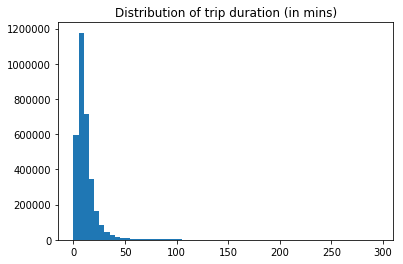

In [22]:
# How long does the average trip take?
# Create bins leaving out extremely high values to see the distribution better
bin_edge=np.arange(0,300,5)
plt.hist(data=df_clean, x='duration_min', bins=bin_edge);
plt.title('Distribution of trip duration (in mins)');

In [19]:
# Having a look at the remaining trips with duration >300
df_clean.query('duration_min >=300')['duration_min'].describe()

count    8441.000000
mean      672.726565
std       331.575309
min       300.050000
25%       382.216667
50%       553.783333
75%       931.100000
max      1439.483333
Name: duration_min, dtype: float64

Analyses on trip duration shows an extremely right skewed distribution. 75% of the trips on an average were under 15 min, the remaining majority under 50 mins, and very few extreme values that seem to be outliers.

#### User type for the member taking a trip

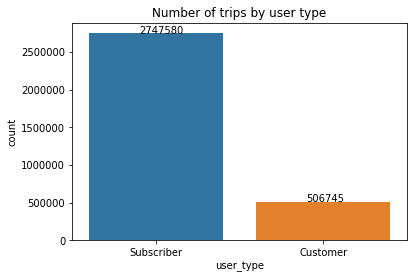

In [24]:
# Does the ride behavior depend on user being a subscriber or customer?
ax = sb.countplot(data=df_clean, x='user_type', order=df_clean['user_type'].value_counts().index);

for p, label in zip(ax.patches, df_clean['user_type'].value_counts()):
    ax.annotate(label, (p.get_x()+0.30, p.get_height()));
plt.title('Number of trips by user type');

Analyses on the user type shows significantly more trips for 'Subscribers' than 'Customer' having 82% higher trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Couple of variables show interesting distribution like how the rides are mostly taken on the weekdays and are at peak at 8am and 5 pm. The age group of 20-40 are the ones using the bikes more than any other age group. One very interesting assumption that the analyses point towards is people taking bikes to work and school- which is amazing. Also, the subscribers seems to be using bikes very deligently as compared to other customers. <br> One unusual point was a 2 month drop in the number of trips after 11/2018 which would be an interesting data point to be investigated.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were a lot of different steps that were followed to clean the data like fixing data types for time related fields, changing few variables to category data type, changing form of the data and/or adding new fields like age category, start hour, start day of week, start month etc. to look at the data through a different lens.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the data and see the impact on one from the other.

#### Check how the number of trips are related to gender and age together

In [21]:
df_clean.groupby('member_gender')['member_age_category'].value_counts()

member_gender  member_age_category
Male           20 - 40                1593286
               40 - 60                 565166
               Greater than 60          64339
               Below 20                 28337
Female         20 - 40                 568876
               40 - 60                 145333
               Greater than 60          12069
               Below 20                  9412
Other          20 - 40                  35577
               40 - 60                  12873
               Greater than 60           1080
               Below 20                   244
Name: member_age_category, dtype: int64

Both males and females have the highest number of trips in the age range of 20-40 followed by 40-60 and minimum by people under 20.

#### Relationship between duration of the trip and member age

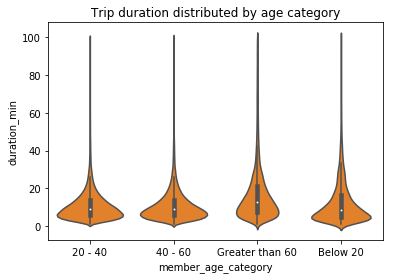

In [28]:
# How is the trip duration impacted by the age
base_color=sb.color_palette()[1]
df_sub=df_clean.query('duration_min <=100')
sb.violinplot(data=df_sub, x='member_age_category', y='duration_min', color=base_color);
plt.title('Trip duration distributed by age category');

Since 75% of trips are under 15 mins, we have filtered the plot for duration under 100 mins to avoid the graph from misleading. As already seen, there are more number of people in 20-40 and 40-60 taking trips but interestingly people greater than 60 have a slightly higher median of duration that the other age groups. The boxplot within the violin for this group is also slightly higher than the other groups. All age ranges have some outliers and extreme values that pulls the violin tip far above. 

#### Relationship between trip duration and the hour of trip

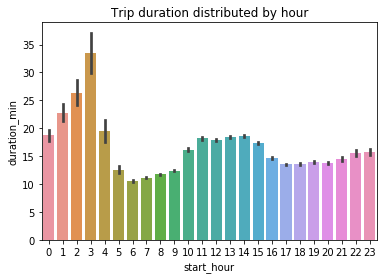

In [30]:
# Average trip duration by hour along with the error bars
sb.barplot(data=df_clean, x='start_hour', y='duration_min');
plt.title('Trip duration distributed by hour');

The average trip duration seems to be within 10-20 mins for majority of the hours. The avg. trip duration is slightly lower before 10 am and after 4 pm  which could explain the vicinity (near proximity) of people taking bikes to work and school. <br> One unsual thing is higher trip duration (25-35 mins) from 1 am to 4 am. Although these trips are fewer in number and thus have a high error bars but it will be good to investigate what causes these longer trips - are these simply outliers or errorneous data points.

#### Relationship of hour of trip and user type

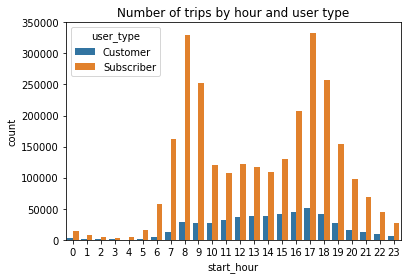

In [31]:
# Analyses if hour of trip is dependent upon the user_type
sb.countplot(data = df_clean, x='start_hour', hue='user_type');
plt.title('Number of trips by hour and user type');

As seen earlier, trips were higher during the mornings and evenings, we now can see how evident it is at 8 am and 5 pm. Also, one additional piece of information we get from this graph is that these higher number of trips are all because of the subscribers which supports our original hypothesis of them riding bikes to work / school. Customers on the other hand have more consistent rides from 8 am - 6 pm (neglible increase when compared to subscribers). These customers could be one time riders, tourists, people riding for fun or trying out bikes.

#### Relationship between station and user type

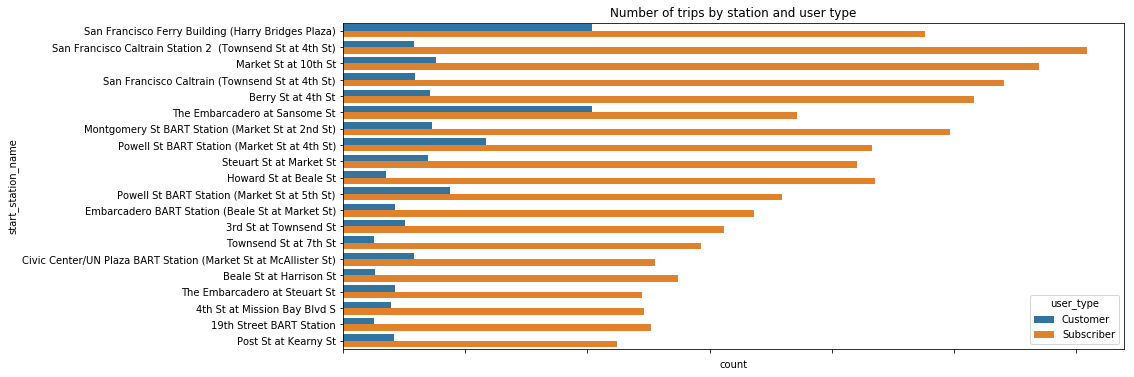

In [8]:
# Create another dataframe with top 20 stations based on number of trips
df_temp = df_clean.groupby('start_station_name', as_index=False).agg({'bike_id':'count'})\
        .sort_values(by='bike_id', ascending=False).iloc[:20,]
df_top20 = df_clean[df_clean["start_station_name"].isin(df_temp["start_station_name"])==True]

# Plot the number of rides by user_type for the top 20 stations
plt.figure(figsize=[14,6]);
g = sb.countplot(data=df_top20, y='start_station_name', hue='user_type', \
                 order=df_top20['start_station_name'].value_counts().index);
g.set_xticklabels(g.get_xticklabels());
plt.title('Number of trips by station and user type');

Subsrcibers have more consistent trip stations. This strengthens our hypothesis that they might be riding on weekdays to their work or school. However, we do not see the same pattern in customers but instead see a more random behavior.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Couple of significant relationships were observed in this section. A strong relationship was seen between the hour of the trip and trip duration i.e. the duration is consistant during the day and higher from 1am to 4am. Another strong relationship was seen in the hour of the trip and user type showing that the subscribers mainly use it at 8am or 5pm while other customers use to pretty consistently through out the day. Lastly, a relation between start station of the trip and user type was seen concluding the subsrcibers have fixed destinations every morning and then back home. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One interesting and unusual observation was a higher trip duration (25-35 mins) from 1 am to 4 am which should be further investigated. Another, interesting data point is higher median trip duration for people greater than 60 years.

## Multivariate Exploration

> Create plots of three or more variables to investigate the data even further.

#### Relationship between hour of the trip, trip duration and user type

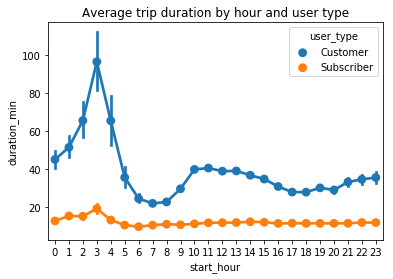

In [35]:
sb.pointplot(data=df_clean, x='start_hour', y='duration_min', hue='user_type');
plt.title('Average trip duration by hour and user type');

This gives us additional piece of information that the average trip duration that was high from 1am to 4am and highest at 3 am was because of customers and not subscribers. Unlike subscribers who are more regularly taking rides, customers seems to be one-time riders.

#### Relationship between age category, gender, and days of week

In [11]:
# create a df with only male and female 
df_mf = df_clean.query("member_gender in ['Male','Female']")
df_mf['member_gender'].unique()
df_mf['member_gender'] = df_mf['member_gender'].cat.remove_unused_categories()
df_mf['member_gender'].values

[Male, Male, Female, Male, Female, ..., Male, Male, Male, Male, Male]
Length: 2986818
Categories (2, object): [Male, Female]

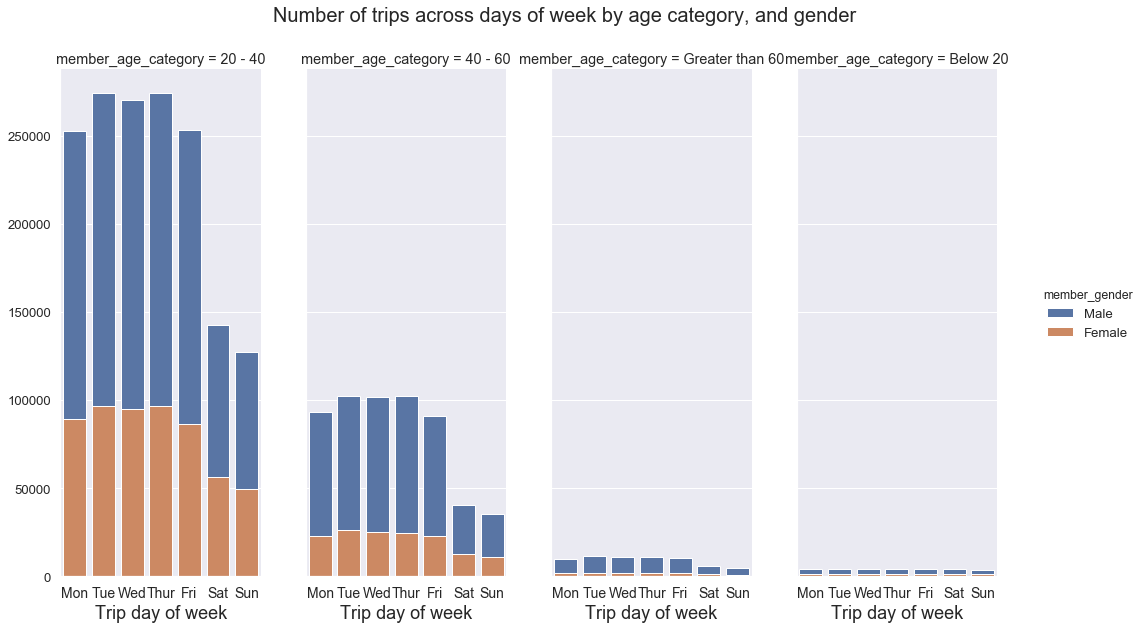

In [12]:
# See number of trips across days of trip by age groups and gender

height = 8.27
aspect = (14.70/4)/(8.27)
sb.set(font_scale=1.2)

g=sb.FacetGrid(data=df_mf, col='member_age_category', hue='member_gender', margin_titles=True, \
               height=height, aspect=aspect)
g.map(sb.countplot, 'start_dow');
g.set_xticklabels(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'], fontsize=14);
g.fig.suptitle('Number of trips across days of week by age category, and gender', y=1.05, fontsize=20);
g.add_legend();

for i in range(4):
    g.axes[0,i].set_xlabel('Trip day of week', fontsize=18);

Looking at these fields together in this plot, explains that majority of the trips are taken by males within the age of 20-40 closely followed by males between 40-60 and females between 20-40. Majority of the trips are taken in the mornings and evenings on the weekdays [Mon-Fri]. While all the other graphs with other categories hardly have any data points.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section helped answer some of the questions we had in the previous sections like which group of people drives mostly at past midnight and have longer trip durations. It also strengthed the relationship we had seen previously acoss age, gender, and days of week.

### Were there any interesting or surprising interactions between features?

> Surprisingly there are enough number of trips in the 40-60 age group and especially for males. Another surprising outcome is extremely low number of trips for people under 20. <br> Although we were able to unveil the group riding bikes at 3am but its still surprising to see people do that. 

## Conclusion
- Most of the trips were taken during the weekdays and were at peak duing the mornings 8am and evenings 5pm. We also observed that the trips were dropped during summers (May-June) and winters (Nov-Dec). A drop in the trips was also seen around 11/2018 which were again picked up after 01/2019. <br> 
- Further, males had ~67% higher trips than females and age group 20-40 had 68% of the total trips.<br>
- Top 3 stations were spotted that had way too many trips when compared to others meaning these stations were most frequently visited. 
- The comparison between subscribers and customers showed subscribers having 82% of the trips which could be related back to high trips on weekdays 8 am and 5 pm and to same stations. An hypothesis could be generated here that most of the subscribers take daily trips to the work or schools. 
- Avg. trip duration for 75% of the trips were within 15 mins which could mean subscribers either live close to their destination or drive to the start station for a shorter trip. The avg. duration for customers however, was quite high and especially from 1am to 4am we observed 25-35 min trip which could mean they mostly are exploring the bikes or are one-time riders.

## References
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe <br>
https://github.com/pandas-dev/pandas/issues/11166 <br>
https://forums.fast.ai/t/how-to-remove-ipynb-checkpoint/8532/47 <br>
https://github.com/mwaskom/seaborn/issues/867 <br>
https://stackoverflow.com/questions/18250298/how-to-check-if-a-value-is-in-the-list-in-selection-from-pandas-data-frame <br>
https://stackoverflow.com/questions/41236370/what-is-as-index-in-groupby-in-pandas <br>
https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot <br>
https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot <br>